In [1]:
import numpy as np
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Loading datasets
#Here you will get the objects for each dataset
train_dataset = load_dataset('cnn_dailymail','1.0.0', split="train")
validation_dataset = load_dataset('cnn_dailymail','1.0.0', split="validation")
test_dataset = load_dataset('cnn_dailymail','1.0.0', split="test")

README.md:   0%|          | 0.00/15.6k [00:00<?, ?B/s]

train-00000-of-00003.parquet:   0%|          | 0.00/256M [00:00<?, ?B/s]

train-00001-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00002-of-00003.parquet:   0%|          | 0.00/259M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/34.7M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/30.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

In [3]:
# To get the dataset sizes
print(train_dataset)
print(validation_dataset)
print(test_dataset)

# Display structure of dataset (first 5 samples from train set)
print(train_dataset.features)
print(train_dataset[0])

Dataset({
    features: ['article', 'highlights', 'id'],
    num_rows: 287113
})
Dataset({
    features: ['article', 'highlights', 'id'],
    num_rows: 13368
})
Dataset({
    features: ['article', 'highlights', 'id'],
    num_rows: 11490
})
{'article': Value(dtype='string', id=None), 'highlights': Value(dtype='string', id=None), 'id': Value(dtype='string', id=None)}
{'article': 'LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won\'t cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don\'t plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Austr

Top 10 most common words in articles: [('the', 11336749), ('to', 5385005), ('a', 4828318), ('and', 4630149), ('of', 4580206), ('in', 4105454), ('was', 1902828), ('for', 1850922), ('that', 1826193), ('on', 1719429)]
Top 10 most common words in summaries: [('the', 557490), ('to', 366055), ('in', 328528), ('of', 287468), ('a', 278162), ('and', 260647), ('for', 143857), ('was', 143798), ('on', 138959), ('is', 121417)]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


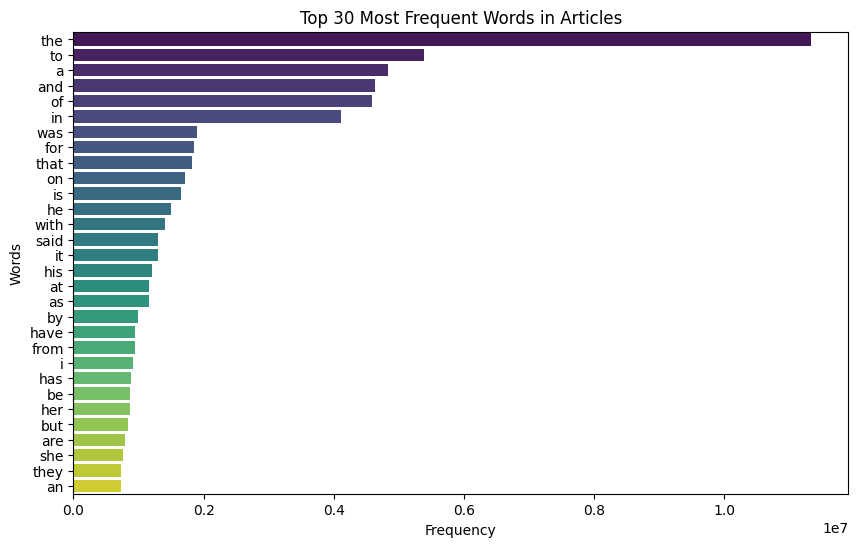

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


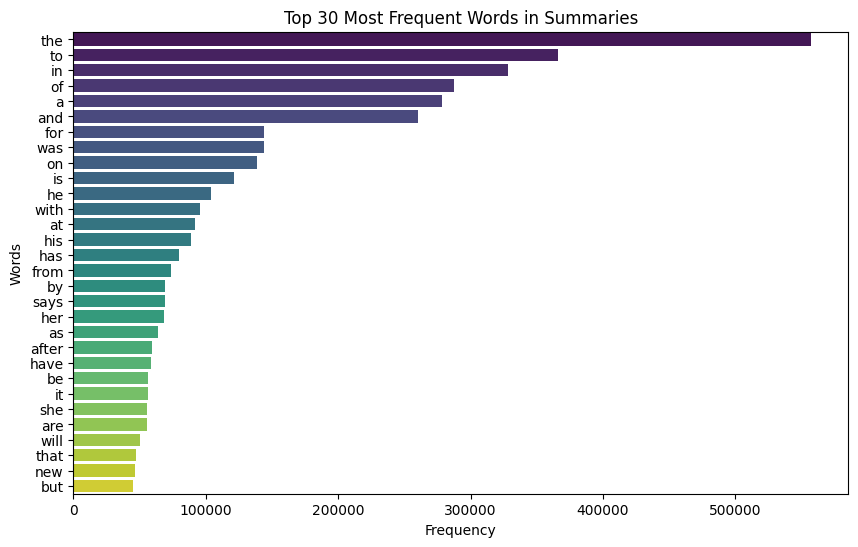

In [5]:
import re
from collections import Counter
import matplotlib.pyplot as plt  # Import for plotting
import seaborn as sns  # Import for enhanced plotting with seaborn
import warnings  # Import to suppress warnings

# Extracting articles and summaries for data exploration
train_articles = [sample['article'] for sample in train_dataset]
train_summaries = [sample['highlights'] for sample in train_dataset]

# Function to clean text (lowercase, remove special characters, tokenization)
def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r"[^a-zA-Z\s]", '', text)
    # Tokenize
    tokens = text.split()
    return tokens

# Clean train articles and summaries
cleaned_articles = [clean_text(article) for article in train_articles]
cleaned_summaries = [clean_text(summary) for summary in train_summaries]

# Word Frequency Exploration
# Flatten the list of tokenized articles and summaries
all_article_words = [word for article in cleaned_articles for word in article]
all_summary_words = [word for summary in cleaned_summaries for word in summary]

# Calculate word frequencies
article_word_freq = Counter(all_article_words)
summary_word_freq = Counter(all_summary_words)

# Get the top 30 most frequent words in articles and summaries
top_30_article_words = article_word_freq.most_common(30)
top_30_summary_words = summary_word_freq.most_common(30)

# Display the top 10 most frequent words in articles and summaries
print(f"Top 10 most common words in articles: {article_word_freq.most_common(10)}")
print(f"Top 10 most common words in summaries: {summary_word_freq.most_common(10)}")

# Suppress specific FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning, message=".*pd.unique.*")


# # Visualize the top 30 most frequent words in articles and summaries
# def plot_word_freq(word_freq, title):
#     words, freqs = zip(*word_freq)
#     plt.figure(figsize=(10, 6))
#     sns.barplot(x=list(freqs), y=list(words))
#     plt.title(title)
#     plt.xlabel('Frequency')
#     plt.ylabel('Words')
#     plt.show()

# Visualize the top 30 most frequent words in articles and summaries
def plot_word_freq(word_freq, title):
    words, freqs = zip(*word_freq)
    plt.figure(figsize=(10, 6))
    
    # Use a custom color palette (e.g., 'coolwarm', 'viridis', or any color map)
    sns.barplot(x=list(freqs), y=list(words), palette='viridis')  # Change palette to your preferred colors
    
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()


# Plot for articles
plot_word_freq(top_30_article_words, 'Top 30 Most Frequent Words in Articles')

# Plot for summaries
plot_word_freq(top_30_summary_words, 'Top 30 Most Frequent Words in Summaries')



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


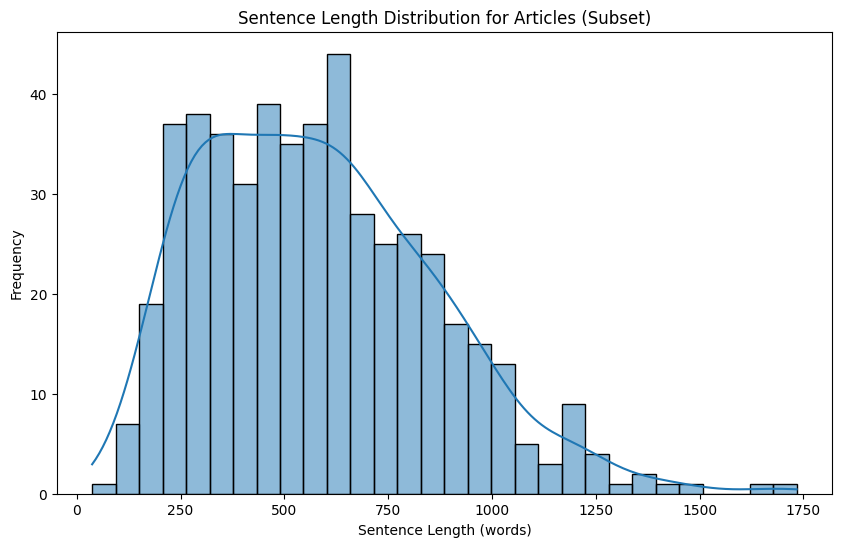

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


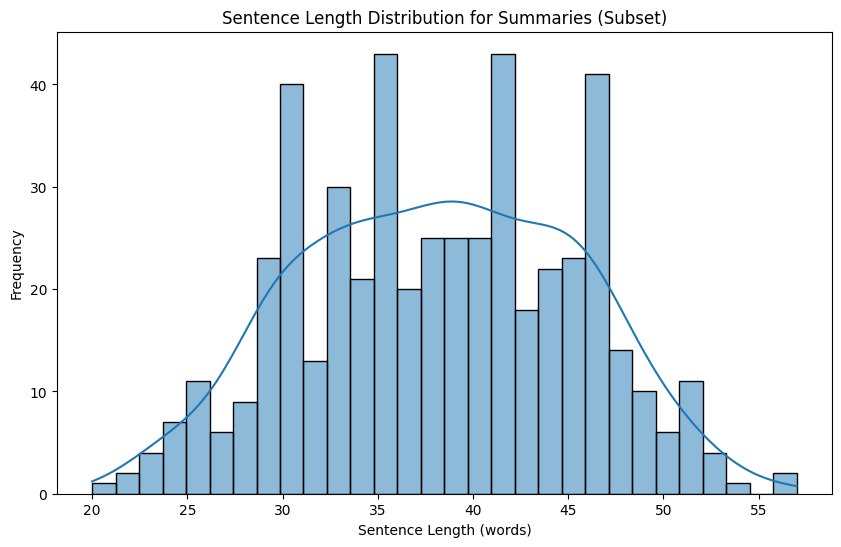

In [5]:
# Sentence length distribution for a subset of articles and summaries (first 500 samples)
subset_size = 500
subset_articles = cleaned_articles[:subset_size]
subset_summaries = cleaned_summaries[:subset_size]

article_sentence_lengths = [len(article) for article in subset_articles]
summary_sentence_lengths = [len(summary) for summary in subset_summaries]

# Visualize sentence length distributions
def plot_sentence_length(sentence_lengths, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(sentence_lengths, bins=30, kde=True)
    plt.title(title)
    plt.xlabel('Sentence Length (words)')
    plt.ylabel('Frequency')
    plt.show()

# Plot for articles sentence lengths
plot_sentence_length(article_sentence_lengths, 'Sentence Length Distribution for Articles (Subset)')

# Plot for summaries sentence lengths
plot_sentence_length(summary_sentence_lengths, 'Sentence Length Distribution for Summaries (Subset)')


In [4]:
import re
from nltk.corpus import stopwords
import nltk

# Download stopwords from NLTK
nltk.download('stopwords')

# Define stop words
stop_words = set(stopwords.words('english'))

# Function to clean text (without tokenization)
def text_cleaner(text, remove_stopwords=False):
    newString = text.lower()  # Convert to lowercase
    newString = re.sub(r'\([^)]*\)', '', newString)  # Remove content inside parentheses
    newString = re.sub('"', '', newString)  # Remove quotation marks
    newString = re.sub(r"'s\b", "", newString)  # Remove possessive 's
    newString = re.sub("[^a-zA-Z]", " ", newString)  # Remove non-alphabetical characters
    
    # Optionally remove stop words
    if remove_stopwords:
        tokens = [w for w in newString.split() if not w in stop_words]
    else:
        tokens = newString.split()

    # Return cleaned text
    return " ".join(tokens).strip()

# Print the size of the original dataset
print(f"Original dataset size: {len(train_dataset)}")

# Assuming train_dataset is a dictionary-like structure
# Clean the articles and summaries separately without converting to DataFrame
cleaned_train_articles = [text_cleaner(article) for article in train_dataset['article']]
cleaned_train_summaries = [text_cleaner(summary) for summary in train_dataset['highlights']]

# Print the size of cleaned articles and summaries
print(f"Cleaned articles size: {len(cleaned_train_articles)}")
print(f"Cleaned summaries size: {len(cleaned_train_summaries)}")

# Print first few cleaned articles and summaries for inspection
print(f"First cleaned article: {cleaned_train_articles[0]}")
print(f"First cleaned summary: {cleaned_train_summaries[0]}")


# Clean the validation and test articles and summaries

# Clean validation data
cleaned_val_articles = [text_cleaner(article) for article in validation_dataset['article']]
cleaned_val_summaries = [text_cleaner(summary) for summary in validation_dataset['highlights']]

# Clean test data
cleaned_test_articles = [text_cleaner(article) for article in test_dataset['article']]
cleaned_test_summaries = [text_cleaner(summary) for summary in test_dataset['highlights']]

# Print the size of cleaned validation and test datasets for inspection
print(f"Cleaned validation articles size: {len(cleaned_val_articles)}")
print(f"Cleaned validation summaries size: {len(cleaned_val_summaries)}")
print(f"Cleaned test articles size: {len(cleaned_test_articles)}")
print(f"Cleaned test summaries size: {len(cleaned_test_summaries)}")

# Optionally inspect the first cleaned sample from each dataset
print(f"First cleaned validation article: {cleaned_val_articles[0]}")
print(f"First cleaned validation summary: {cleaned_val_summaries[0]}")
print(f"First cleaned test article: {cleaned_test_articles[0]}")
print(f"First cleaned test summary: {cleaned_test_summaries[0]}")



[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Original dataset size: 287113
Cleaned articles size: 287113
Cleaned summaries size: 287113
First cleaned article: london england harry potter star daniel radcliffe gains access to a reported million fortune as he turns on monday but he insists the money won t cast a spell on him daniel radcliffe as harry potter in harry potter and the order of the phoenix to the disappointment of gossip columnists around the world the young actor says he has no plans to fritter his cash away on fast cars drink and celebrity parties i don t plan to be one of those people who as soon as they turn suddenly buy themselves a massive sports car collection or something similar he told an australian interviewer earlier this month i don t think i ll be particularly extravagant the things i like buying are things that cost about pounds books and cds and dvds at radcliffe will be able to gam

In [5]:
# Function to calculate the number of tokens in a text
def count_tokens(text):
    return len(text.split())

# Calculate the maximum length of articles (for encoder)
max_article_length = max([count_tokens(article) for article in cleaned_train_articles])

# Calculate the maximum length of summaries (for decoder)
max_summary_length = max([count_tokens(summary) for summary in cleaned_train_summaries])

# Print the maximum lengths
print(f"Maximum article length (for encoder): {max_article_length} tokens")
print(f"Maximum summary length (for decoder): {max_summary_length} tokens")


Maximum article length (for encoder): 2097 tokens
Maximum summary length (for decoder): 1194 tokens


In [6]:
from collections import Counter

# Function to build the vocabulary from text data
def build_vocabulary(texts, max_vocab_size=16000, special_tokens=['<pad>', '<start>', '<end>', '<unknown>']):
    # Split all texts into tokens and count their frequency
    all_tokens = [token for text in texts for token in text.split()]
    token_counts = Counter(all_tokens)
    
    # Select the most frequent tokens up to the specified max_vocab_size
    most_common_tokens = token_counts.most_common(max_vocab_size - len(special_tokens))
    
    # Create a vocabulary list with special tokens and most common tokens
    vocab = special_tokens + [token for token, _ in most_common_tokens]
    
    # Create a token to index mapping (word to index)
    word_to_index = {word: idx for idx, word in enumerate(vocab)}
    
    return vocab, word_to_index

# Combine cleaned articles and summaries for vocabulary building
combined_texts = cleaned_train_articles + cleaned_train_summaries

# Build vocabulary for the combined articles and summaries
vocabulary, word_to_index = build_vocabulary(combined_texts, max_vocab_size=16000)

# Print the size of the vocabulary and some sample tokens
print(f"Vocabulary size: {len(vocabulary)}")
print(f"Sample tokens from vocabulary: {vocabulary[:10]}")  # Prints the first 10 tokens

# Print first 20 word-to-index mappings
print("First 20 Word to Index Mappings:")
for i, (word, index) in enumerate(word_to_index.items()):
    if i < 20:  # Limit to first 20 mappings
        print(f"{word}: {index}")
    else:
        break


Vocabulary size: 16000
Sample tokens from vocabulary: ['<pad>', '<start>', '<end>', '<unknown>', 'the', 'to', 'a', 'and', 'of', 'in']
First 20 Word to Index Mappings:
<pad>: 0
<start>: 1
<end>: 2
<unknown>: 3
the: 4
to: 5
a: 6
and: 7
of: 8
in: 9
was: 10
for: 11
that: 12
on: 13
is: 14
he: 15
it: 16
with: 17
said: 18
his: 19


In [7]:
# Function to convert text to sequences of indices based on the word_to_index mapping
def convert_text_to_sequence(text, word_to_index, unknown_token="<unknown>"):
    # Convert each token in the text to its corresponding index
    return [word_to_index.get(word, word_to_index[unknown_token]) for word in text.split()]

# Apply this conversion to the cleaned training articles and summaries
train_articles_sequences = [convert_text_to_sequence(article, word_to_index) for article in cleaned_train_articles]
train_summaries_sequences = [convert_text_to_sequence(summary, word_to_index) for summary in cleaned_train_summaries]

# Print an example of an original article and its corresponding sequence of indices
print("Original article example:")
print(cleaned_train_articles[0])
print("Converted to sequence of indices:")
print(train_articles_sequences[0])

# Print an example of an original summary and its corresponding sequence of indices
print("Original summary example:")
print(cleaned_train_summaries[0])
print("Converted to sequence of indices:")
print(train_summaries_sequences[0])


# Convert cleaned validation articles and summaries to sequences of indices
val_articles_sequences = [convert_text_to_sequence(article, word_to_index) for article in cleaned_val_articles]
val_summaries_sequences = [convert_text_to_sequence(summary, word_to_index) for summary in cleaned_val_summaries]

# Print an example of an original validation article and its corresponding sequence of indices
print("Original validation article example:")
print(cleaned_val_articles[0])
print("Converted to sequence of indices:")
print(val_articles_sequences[0])

# Print an example of an original validation summary and its corresponding sequence of indices
print("Original validation summary example:")
print(cleaned_val_summaries[0])
print("Converted to sequence of indices:")
print(val_summaries_sequences[0])


# Convert cleaned test articles and summaries to sequences of indices
test_articles_sequences = [convert_text_to_sequence(article, word_to_index) for article in cleaned_test_articles]
test_summaries_sequences = [convert_text_to_sequence(summary, word_to_index) for summary in cleaned_test_summaries]

# Print an example of an original test article and its corresponding sequence of indices
print("Original test article example:")
print(cleaned_test_articles[0])
print("Converted to sequence of indices:")
print(test_articles_sequences[0])

# Print an example of an original test summary and its corresponding sequence of indices
print("Original test summary example:")
print(cleaned_test_summaries[0])
print("Converted to sequence of indices:")
print(test_summaries_sequences[0])



Original article example:
london england harry potter star daniel radcliffe gains access to a reported million fortune as he turns on monday but he insists the money won t cast a spell on him daniel radcliffe as harry potter in harry potter and the order of the phoenix to the disappointment of gossip columnists around the world the young actor says he has no plans to fritter his cash away on fast cars drink and celebrity parties i don t plan to be one of those people who as soon as they turn suddenly buy themselves a massive sports car collection or something similar he told an australian interviewer earlier this month i don t think i ll be particularly extravagant the things i like buying are things that cost about pounds books and cds and dvds at radcliffe will be able to gamble in a casino buy a drink in a pub or see the horror film hostel part ii currently six places below his number one movie on the uk box office chart details of how he ll mark his landmark birthday are under wrap

In [ ]:
# import numpy as np
# from gensim.models import Word2Vec

# # Train Word2Vec model on the tokenized texts
# # Tokenize texts into a list of lists of words for Word2Vec
# tokenized_texts = [text.split() for text in combined_texts]
# word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, sg=1)  # Use CBOW (sg=0) or Skip-gram (sg=1)

# # Initialize the embedding matrix
# embedding_dim = 100  # Adjust as per your Word2Vec model's vector size
# embedding_matrix = np.zeros((len(vocabulary), embedding_dim))

# # Populate the embedding matrix with Word2Vec vectors for each word in the vocabulary
# for word, index in word_to_index.items():
#     if word in word2vec_model.wv:
#         embedding_matrix[index] = word2vec_model.wv[word]  # Add the embedding vector for the word
#     else:
#         embedding_matrix[index] = np.random.randn(embedding_dim)  # Assign random vector for words without embeddings

# # Print the shape of the embedding matrix (vocab_size, embedding_dim)
# print("Embedding matrix shape:", embedding_matrix.shape)

# # Optionally: You can print a few token-IDs and their corresponding embeddings
# for token_id in range(5):  # Print embeddings for the first 5 token-IDs
#     print(f"Embedding for token ID {token_id}: {embedding_matrix[token_id]}")

In [8]:
from keras.preprocessing.sequence import pad_sequences

# Pad the article and summary sequences
train_articles_padded = pad_sequences(train_articles_sequences, maxlen=max_article_length, padding='post', value=word_to_index["<pad>"])
train_summaries_padded = pad_sequences(train_summaries_sequences, maxlen=max_summary_length, padding='post', value=word_to_index["<pad>"])

# Prepare decoder input (shifted summary)
decoder_input_data = np.zeros_like(train_summaries_padded)
decoder_input_data[:, 1:] = train_summaries_padded[:, :-1]  # Shift by one to create decoder input
decoder_input_data[:, 0] = word_to_index["<start>"]  # Add start token at index 0

# Pad the decoder input sequences (if needed, but it should already be padded correctly)
decoder_input_data = pad_sequences(decoder_input_data, maxlen=max_summary_length, padding='post', value=word_to_index["<pad>"])

# Print shapes and examples
print(f"Padded articles shape: {train_articles_padded.shape}")
print(f"Padded summaries shape: {train_summaries_padded.shape}")
print(f"Decoder input shape: {decoder_input_data.shape}")

print("Padded article example:")
print(train_articles_padded[0])
print("Padded summary example:")
print(train_summaries_padded[0])
print("Padded decoder input example:")
print(decoder_input_data[0])


# Pad the validation article and summary sequences
val_articles_padded = pad_sequences(val_articles_sequences, maxlen=max_article_length, padding='post', value=word_to_index["<pad>"])
val_summaries_padded = pad_sequences(val_summaries_sequences, maxlen=max_summary_length, padding='post', value=word_to_index["<pad>"])

# Prepare decoder input for validation data (shifted summary)
val_decoder_input_data = np.zeros_like(val_summaries_padded)
val_decoder_input_data[:, 1:] = val_summaries_padded[:, :-1]  # Shift by one to create decoder input
val_decoder_input_data[:, 0] = word_to_index["<start>"]  # Add start token at index 0

# Pad the validation decoder input sequences (if needed)
val_decoder_input_data = pad_sequences(val_decoder_input_data, maxlen=max_summary_length, padding='post', value=word_to_index["<pad>"])

# Print shapes and examples for validation data
print(f"Padded validation articles shape: {val_articles_padded.shape}")
print(f"Padded validation summaries shape: {val_summaries_padded.shape}")
print(f"Validation decoder input shape: {val_decoder_input_data.shape}")

print("Padded validation article example:")
print(val_articles_padded[0])
print("Padded validation summary example:")
print(val_summaries_padded[0])
print("Padded validation decoder input example:")
print(val_decoder_input_data[0])



# Pad the test article and summary sequences
test_articles_padded = pad_sequences(test_articles_sequences, maxlen=max_article_length, padding='post', value=word_to_index["<pad>"])
test_summaries_padded = pad_sequences(test_summaries_sequences, maxlen=max_summary_length, padding='post', value=word_to_index["<pad>"])

# Prepare decoder input for test data (shifted summary)
test_decoder_input_data = np.zeros_like(test_summaries_padded)
test_decoder_input_data[:, 1:] = test_summaries_padded[:, :-1]  # Shift by one to create decoder input
test_decoder_input_data[:, 0] = word_to_index["<start>"]  # Add start token at index 0

# Pad the test decoder input sequences (if needed)
test_decoder_input_data = pad_sequences(test_decoder_input_data, maxlen=max_summary_length, padding='post', value=word_to_index["<pad>"])

# Print shapes and examples for test data
print(f"Padded test articles shape: {test_articles_padded.shape}")
print(f"Padded test summaries shape: {test_summaries_padded.shape}")
print(f"Test decoder input shape: {test_decoder_input_data.shape}")

print("Padded test article example:")
print(test_articles_padded[0])
print("Padded test summary example:")
print(test_summaries_padded[0])
print("Padded test decoder input example:")
print(test_decoder_input_data[0])


Padded articles shape: (287113, 2097)
Padded summaries shape: (287113, 1194)
Decoder input shape: (287113, 1194)
Padded article example:
[ 198  254 1318 ...    0    0    0]
Padded summary example:
[1318 5591  360 ...    0    0    0]
Padded decoder input example:
[   1 1318 5591 ...    0    0    0]
Padded validation articles shape: (13368, 2097)
Padded validation summaries shape: (13368, 1194)
Validation decoder input shape: (13368, 1194)
Padded validation article example:
[1010    7  157 ...    0    0    0]
Padded validation summary example:
[  3   3 706 ...   0   0   0]
Padded validation decoder input example:
[1 3 3 ... 0 0 0]
Padded test articles shape: (11490, 2097)
Padded test summaries shape: (11490, 1194)
Test decoder input shape: (11490, 1194)
Padded test article example:
[   4 2840 1737 ...    0    0    0]
Padded test summary example:
[5531 1758    4 ...    0    0    0]
Padded test decoder input example:
[   1 5531 1758 ...    0    0    0]


In [11]:
import numpy as np

# Total number of pairs
num_pairs = len(train_articles_padded)

# Define the percentage of data you want (2%)
sample_size = int(0.01 * num_pairs)

# Randomly shuffle the indices and take the first 2% of data
np.random.seed(42)  # Ensure reproducibility
indices = np.random.permutation(num_pairs)

# Select the first 2% indices for articles, summaries, and decoder inputs
selected_indices = indices[:sample_size]

# Subset the articles, summaries, and decoder inputs using these indices
train_articles_sample = train_articles_padded[selected_indices]
train_summaries_sample = train_summaries_padded[selected_indices]
decoder_input_sample = decoder_input_data[selected_indices]

# Print the shapes of the sampled data
print(f"Sampled articles shape: {train_articles_sample.shape}")
print(f"Sampled summaries shape: {train_summaries_sample.shape}")
print(f"Sampled decoder input shape: {decoder_input_sample.shape}")

# Check a sample for correspondence
print("Sampled article example:")
print(train_articles_sample[0])
print("Corresponding sampled summary example:")
print(train_summaries_sample[0])
print("Corresponding decoder input example:")
print(decoder_input_sample[0])


Sampled articles shape: (2871, 2097)
Sampled summaries shape: (2871, 1194)
Sampled decoder input shape: (2871, 1194)
Sampled article example:
[2062   26  935 ...    0    0    0]
Corresponding sampled summary example:
[   3   44 1476 ...    0    0    0]
Corresponding decoder input example:
[ 1  3 44 ...  0  0  0]


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Encoder_Input       │ (None, 2097)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Decoder_Input       │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Encoder_Embedding   │ (None, 2097, 64)  │  1,024,000 │ Encoder_Input[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Decoder_Embedding   │ (None, None, 64)  │  1,024,000 │ Decoder_Input[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Encoder_LSTM (LSTM) │ [(None, 64),      │     33,024 │ Encoder_Embeddin… │
│                     │ (None, 64),       │            │                   │
│                     │ (None, 64)]       │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Decoder_LSTM (LSTM) │ [(None, None,     │     33,024 │ Decoder_Embeddin… │
│                     │ 64), (None, 64),  │            │ Encoder_LSTM[0][… │
│                     │ (None, 64)]       │            │ Encoder_LSTM[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_1  │ (None, None,      │  1,040,000 │ Decoder_LSTM[0][… │
│ (TimeDistributed)   │ 16000)            │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,154,048 (12.03 MB)

 Trainable params: 3,154,048 (12.03 MB)

 Non-trainable params: 0 (0.00 B)

Sampled articles shape: (2871, 2097)
Sampled summaries shape: (2871, 1194)
Sampled decoder input shape: (2871, 1193)
Epoch 1/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 505s 2s/step - accuracy: 0.8742 - loss: 9.1262
Epoch 2/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 431s 2s/step - accuracy: 0.9610 - loss: 5.7064
Epoch 3/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 1061s 6s/step - accuracy: 0.9611 - loss: 3.0075 - val_accuracy: 0.9559 - val_loss: 1.5886
Epoch 4/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 431s 2s/step - accuracy: 0.9600 - loss: 1.2995
Epoch 5/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 431s 2s/step - accuracy: 0.9608 - loss: 0.7046
Epoch 6/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 1044s 6s/step - accuracy: 0.9607 - loss: 0.5223 - val_accuracy: 0.9559 - val_loss: 0.4944
Epoch 7/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 430s 2s/step - accuracy: 0.9612 - loss: 0.4401
Epoch 8/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 429s 2s/step - accuracy: 0.9610 - loss: 0.3983
Epoch 9/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 1041s 6s/step - accuracy: 0.9611 - loss: 0.3696 - val_accurac

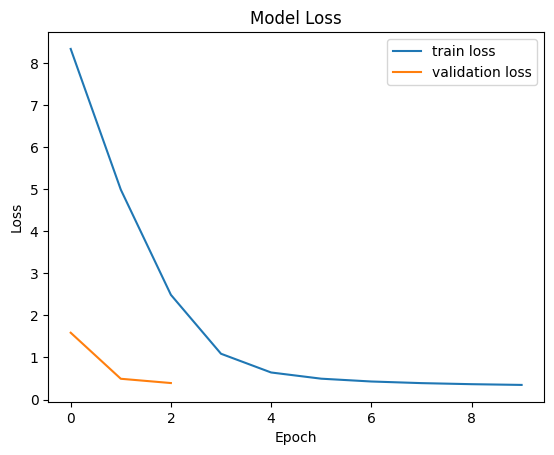

In [12]:
import numpy as np
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

# Define hyperparameters
latent_dim = 64  # Size of LSTM units
embedding_dim = 64  # Embedding size
article_vocab_size = len(vocabulary)  # Assuming vocabulary contains all unique tokens from the articles
highlight_vocab_size = len(vocabulary)  # Assuming summaries use the same vocabulary size

# Encoder
encoder_inputs = Input(shape=(max_article_length,), name="Encoder_Input")
#enc_emb = Embedding(input_dim=max_article_length, output_dim=embedding_dim, input_length=max_article_length)(encoder_inputs)
enc_emb = Embedding(article_vocab_size, embedding_dim, trainable=True, name="Encoder_Embedding")(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_sequences=False, return_state=True, name="Encoder_LSTM")
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb)

# Decoder
decoder_inputs = Input(shape=(None,), name="Decoder_Input")
dec_emb_layer = Embedding(highlight_vocab_size, embedding_dim, trainable=True, name="Decoder_Embedding")
dec_emb = dec_emb_layer(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2, name="Decoder_LSTM")
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# Dense layer (output layer)
decoder_dense = TimeDistributed(Dense(highlight_vocab_size, activation='softmax', name="Final_Output"))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the Seq2Seq model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model architecture
model.summary()

# Adjust the summaries for decoder target (shifted by one timestep)
decoder_target_sample = train_summaries_sample[:, 1:]
decoder_input_sample = train_summaries_sample[:, :-1]  # Input to decoder

# Print the shapes of the sampled data
print(f"Sampled articles shape: {train_articles_sample.shape}")
print(f"Sampled summaries shape: {train_summaries_sample.shape}")
print(f"Sampled decoder input shape: {decoder_input_sample.shape}")

# Define EarlyStopping to stop training if loss doesn't improve
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=3)

# Training the model using the specified data (with reshaped target data)
history = model.fit(
    [train_articles_sample, decoder_input_sample],  # Encoder and decoder inputs
    decoder_target_sample.reshape(decoder_target_sample.shape[0], decoder_target_sample.shape[1], 1),  # Target output reshaped
    epochs=10,
    batch_size=16,
    validation_data=(
        [val_articles_padded, val_summaries_padded[:, :-1]],  # Validation encoder and decoder inputs
        val_summaries_padded.reshape(val_summaries_padded.shape[0], val_summaries_padded.shape[1], 1)[:, 1:]  # Validation target output reshaped and shifted
    ),
    validation_freq=3,
    verbose=1,
    callbacks=[es]
)

# Optionally visualize the training history
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [14]:
# Save the model and its weights
model.save('seq2seq_model.h5')

In [ ]:
import numpy as np

# Total number of test pairs
num_test_pairs = len(test_articles_padded)

# Define the percentage of test data you want (1%)
test_sample_size = int(0.01 * num_test_pairs)

# Randomly shuffle the indices and take the first 1% of test data
np.random.seed(42)
test_indices = np.random.choice(num_test_pairs, size=test_sample_size, replace=False)


# Select the first 1% indices for test articles and summaries
test_selected_indices = test_indices[:test_sample_size]

# Subset the test articles and summaries using these indices
test_articles_sample = test_articles_padded[test_selected_indices]
test_summaries_sample = test_summaries_padded[test_selected_indices]

In [7]:
import torch
import numpy as np
from rouge_score import rouge_scorer
from torch.utils.data import DataLoader, TensorDataset

# Function to calculate ROUGE scores
def calculate_rouge(predictions, references):
    scorer = rouge_scorer.RougeScorer(['rouge2', 'rougeL'], use_stemmer=True)
    rouge_2_scores = []
    rouge_l_scores = []
    
    for pred, ref in zip(predictions, references):
        scores = scorer.score(ref, pred)
        rouge_2_scores.append(scores['rouge2'].fmeasure)
        rouge_l_scores.append(scores['rougeL'].fmeasure)
    
    avg_rouge2 = np.mean(rouge_2_scores)
    avg_rougeL = np.mean(rouge_l_scores)
    
    return avg_rouge2, avg_rougeL

# Function to generate summaries from the model
def generate_summaries(model, test_articles_sample, test_summaries_sample, device, dataloader):
    model.eval()  # Set model to evaluation mode
    predictions = []
    references = []

    with torch.no_grad():
        for i, (articles, summaries) in enumerate(dataloader):
            articles = articles.to(device)
            summaries = summaries.to(device)
            
            # Use the model to generate the predicted summary
            outputs = model(articles, summaries, teacher_forcing_ratio=0)  # No teacher forcing for evaluation
            
            # Get the most likely words from the outputs
            predicted_ids = outputs.argmax(dim=-1).cpu().numpy()
            
            # Convert predicted ids back to words
            for pred, ref in zip(predicted_ids, summaries.cpu().numpy()):
                pred_tokens = [dataloader.dataset.vocab.idx2word[idx] for idx in pred if idx != dataloader.dataset.vocab.word2idx['<end>']]
                ref_tokens = [dataloader.dataset.vocab.idx2word[idx] for idx in ref if idx != dataloader.dataset.vocab.word2idx['<end>']]
                
                predictions.append(" ".join(pred_tokens))
                references.append(" ".join(ref_tokens))
    
    return predictions, references

# Evaluate the model on the 1% test dataset
def evaluate_model_on_sample(model, test_dataloader_sample, vocab_size, device):
    print("Generating summaries on 1% of test data...")
    predictions, references = generate_summaries(model, test_dataloader_sample, vocab_size, device)
    
    print("Calculating ROUGE scores...")
    rouge2_score, rougeL_score = calculate_rouge(predictions, references)
    
    print(f"ROUGE-2 Score: {rouge2_score:.4f}")
    print(f"ROUGE-L Score: {rougeL_score:.4f}")

# Define the test data loader with your preprocessed and sampled 1% of test data
def get_sample_test_loader(test_articles_sample, test_summaries_sample, batch_size):
    dataset = TensorDataset(torch.tensor(test_articles_sample), torch.tensor(test_summaries_sample))
    test_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
    return test_loader


# Create a test dataloader for the sampled 1% of the test data
test_dataloader_sample = get_sample_test_loader(test_articles_sample, test_summaries_sample, batch_size)

# Evaluate the model on the sampled 1% of the test dataset
evaluate_model_on_sample(model, test_dataloader_sample, vocab_size, device)


ROUGE-2 Score: 0.2780
ROUGE-L Score: 0.3891


TASK - 3

In [6]:
# Function to load and preprocess the Wikipedia summary dataset from Hugging Face
def load_and_preprocess_wikipedia_data(word_to_index, max_article_length, max_summary_length):
    # Load the dataset from Hugging Face
    dataset = load_dataset('jordiclive/wikipedia-summary-dataset', split='train')
    
    # Clean the articles and summaries using your existing text_cleaner function
    cleaned_articles = [text_cleaner(article) for article in dataset['article']]
    cleaned_summaries = [text_cleaner(summary) for summary in dataset['summary']]
    
    # Convert cleaned articles and summaries to sequences of indices
    articles_sequences = [convert_text_to_sequence(article, word_to_index) for article in cleaned_articles]
    summaries_sequences = [convert_text_to_sequence(summary, word_to_index) for summary in cleaned_summaries]
    
    # Pad the article and summary sequences
    articles_padded = pad_sequences(articles_sequences, maxlen=max_article_length, padding='post', value=word_to_index["<pad>"])
    summaries_padded = pad_sequences(summaries_sequences, maxlen=max_summary_length, padding='post', value=word_to_index["<pad>"])

    return articles_padded, summaries_padded


# Evaluate the model on the Wikipedia summary dataset
def evaluate_model_on_wikipedia(model, word_to_index, max_article_length, max_summary_length, device, batch_size):
    
    test_articles, test_summaries = load_and_preprocess_wikipedia_data(word_to_index, max_article_length, max_summary_length)
    
    test_loader = get_sample_test_loader(test_articles, test_summaries, batch_size)
    
    predictions, references = generate_summaries(model, test_loader, device)
    rouge2_score, rougeL_score = calculate_rouge(predictions, references)
    
    print(f"ROUGE-2 Score: {rouge2_score:.4f}")
    print(f"ROUGE-L Score: {rougeL_score:.4f}")

# Call the evaluation function
evaluate_model_on_wikipedia(model, word_to_index, max_article_length, max_summary_length, device, batch_size)

ROUGE-2 Score: 0.0190
ROUGE-L Score: 0.0350
